<a href="https://colab.research.google.com/github/TheAgaveFairy/MusicGeneration/blob/main/exploring_eeg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
import os

In [2]:
!pip install -q kaggle
from google.colab import files
files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
! kaggle datasets download 'sigfest/database-for-emotion-recognition-system-gameemo'
! unzip database-for-emotion-recognition-system-gameemo.zip

# /content/database-for-emotion-recognition-system-gameemo.zip
path = '/content/GAMEEMO'

Dataset URL: https://www.kaggle.com/datasets/sigfest/database-for-emotion-recognition-system-gameemo
License(s): Attribution 4.0 International (CC BY 4.0)
 99% 1.69G/1.70G [00:22<00:00, 147MB/s]
100% 1.70G/1.70G [00:22<00:00, 81.0MB/s]
Archive:  database-for-emotion-recognition-system-gameemo.zip
  inflating: GAMEEMO/(S01)/Preprocessed EEG Data/.csv format/S01G1AllChannels.csv  
  inflating: GAMEEMO/(S01)/Preprocessed EEG Data/.csv format/S01G2AllChannels.csv  
  inflating: GAMEEMO/(S01)/Preprocessed EEG Data/.csv format/S01G3AllChannels.csv  
  inflating: GAMEEMO/(S01)/Preprocessed EEG Data/.csv format/S01G4AllChannels.csv  
  inflating: GAMEEMO/(S01)/Preprocessed EEG Data/.mat format/S01G1AllChannels.mat  
  inflating: GAMEEMO/(S01)/Preprocessed EEG Data/.mat format/S01G2AllChannels.mat  
  inflating: GAMEEMO/(S01)/Preprocessed EEG Data/.mat format/S01G3AllChannels.mat  
  inflating: GAMEEMO/(S01)/Preprocessed EEG Data/.mat format/S01G4AllChannels.mat  
  inflating: GAMEEMO/(S01)/Raw

In [52]:
def list_files(startpath, trunc=True):
    print(f"root path is:\n{path}\nbeginning walk:")
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        if trunc:
            files = files[:2]
        for f in files:
            print('{}{}'.format(subindent, f))
list_files(path, trunc=False)

root path is:
/content/GAMEEMO
beginning walk:
GAMEEMO/
    (S17)/
        Preprocessed EEG Data/
            .csv format/
                S17G1AllChannels.csv
                S17G2AllChannels.csv
                S17G3AllChannels.csv
                S17G4AllChannels.csv
            .mat format/
                S17G4AllChannels.mat
                S17G1AllChannels.mat
                S17G3AllChannels.mat
                S17G2AllChannels.mat
        Raw EEG Data/
            .csv format/
                S17G2AllRawChannels.csv
                S17G4AllRawChannels.csv
                S17G3AllRawChannels.csv
                S17G1AllRawChannels.csv
            .mat format/
                S17G3AllRawChannels.mat
                S17G4AllRawChannels.mat
                S17G2AllRawChannels.mat
                S17G1AllRawChannels.mat
        SAM Ratings/
            G3.pdf
            G1.pdf
            G2.pdf
            G4.pdf
    (S07)/
        Preprocessed EEG Data/
            .csv format/


In [35]:
!pip install mne
!pip install pymatreader
import mne

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
    package_set, _ = create_package_

In [53]:
test_csv = os.path.join(path, '(S11)/Preprocessed EEG Data/.csv format/S11G2AllChannels.csv')
df = pd.read_csv(test_csv)
df = df.drop(columns=['Unnamed: 14'])
df.head()

,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8
0,-23.6207,-21.6925,-20.7282,13.4974,119.0665,-22.1745,21.2101,-85.3231,10.6053,5.3026,-5.3026,-38.5643,37.6000,24.1026
1,-14.0083,-17.9804,-24.7871,17.9902,123.4917,-11.6850,19.9375,-80.6857,12.3791,8.8409,-8.8409,-34.3223,26.6669,26.5129
2,-19.4348,-16.9020,-29.5664,14.0182,118.9747,-11.9482,16.3311,-80.1831,9.7082,8.3104,-8.3104,-34.6731,20.2466,21.0657
3,-32.3687,-23.3595,-21.7667,4.7412,107.7386,-23.5231,13.1819,-78.9875,8.4025,2.2680,-2.2680,-28.4951,23.6114,17.1504
4,-25.7263,-18.5835,-18.5325,9.7599,108.0232,-17.2915,9.9808,-71.8379,12.2372,3.0962,-3.0962,-24.8572,19.7845,27.2086


In [54]:
df.columns

Index(['AF3', 'AF4', 'F3', 'F4', 'F7', 'F8', 'FC5', 'FC6', 'O1', 'O2', 'P7',
       'P8', 'T7', 'T8'],
      dtype='object')

In [55]:
col_names = list(df.columns)
mne_info = mne.create_info(col_names, sfreq=128, ch_types='eeg') # sr should mean 5min result

In [56]:
raw = mne.io.RawArray(df.transpose(), mne_info)
raw

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   298.836 secs
Ready.


<RawArray | 14 x 38252 (298.8 s), ~4.1 MiB, data loaded>

In [57]:
raw.info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

In [58]:
# https://www.kaggle.com/code/sabbirshibli/gameemo-test

scan_durn=raw._data.shape[1]/raw.info['sfreq']
print(f'Duration of EEG recording = {scan_durn} sec, or {scan_durn/60} min')

#FOR EX: If we want to access only the first 10 time points of channel 8 we would use:
print(raw._data[8, :11])

Duration of EEG recording = 298.84375 sec, or 4.980729166666666 min
[10.6053 12.3791  9.7082  8.4025 12.2372 13.4307 10.9378  6.1842  2.1975
  3.9941  6.8875]


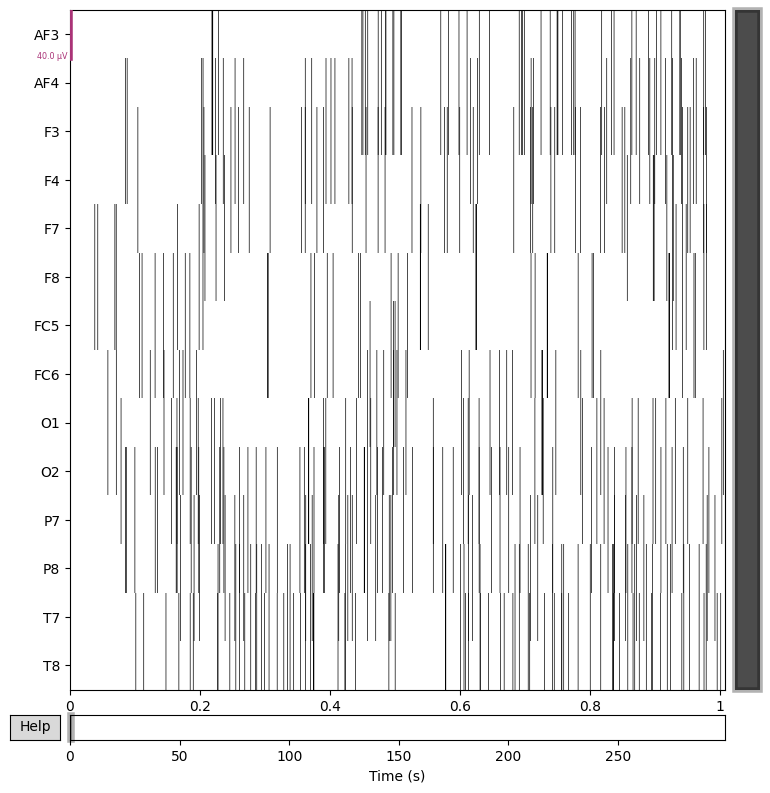

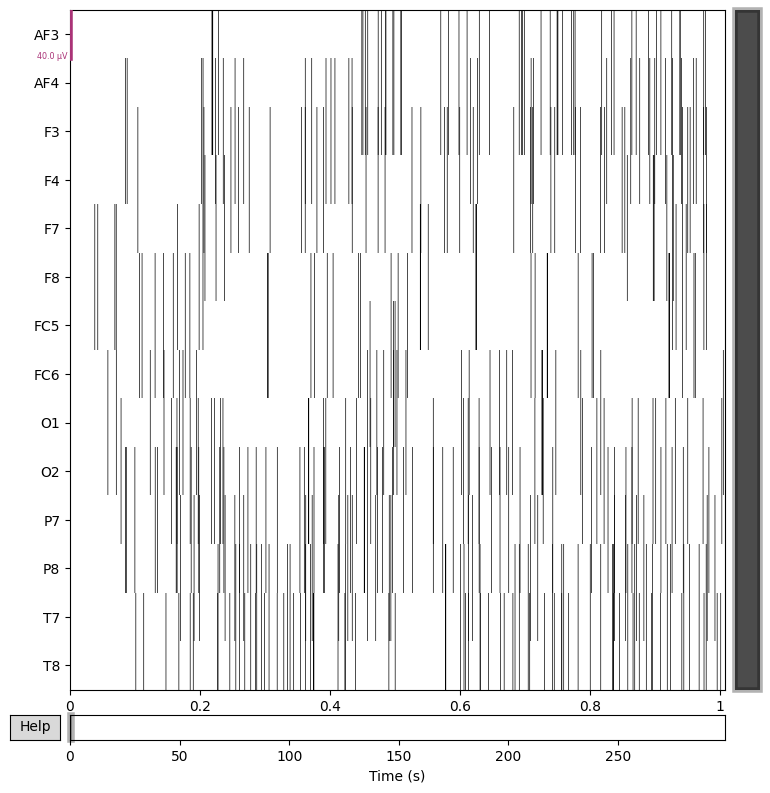

In [62]:
mne.viz.use_browser_backend('matplotlib')
raw.plot(duration=1)

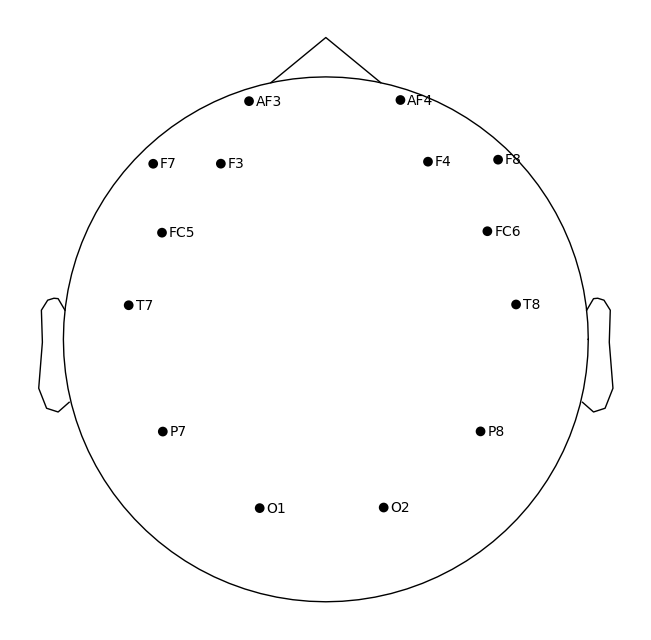

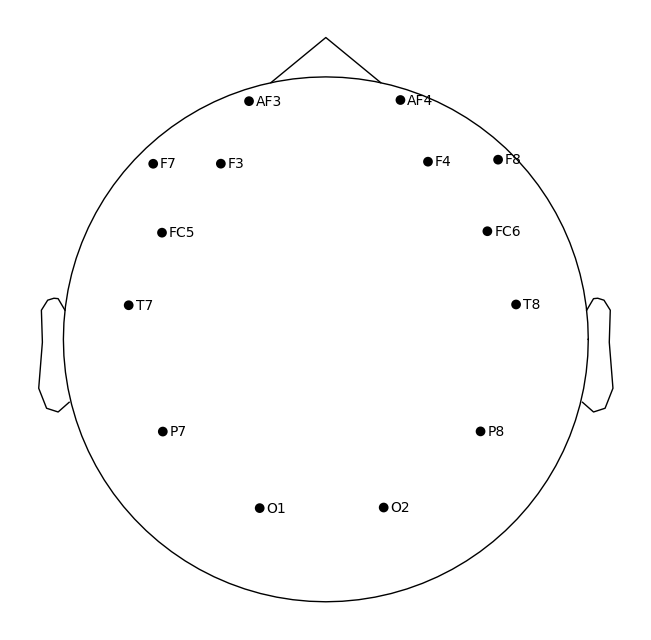

In [60]:
raw.set_montage('standard_1005')
raw.plot_sensors(show_names=True)

Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).


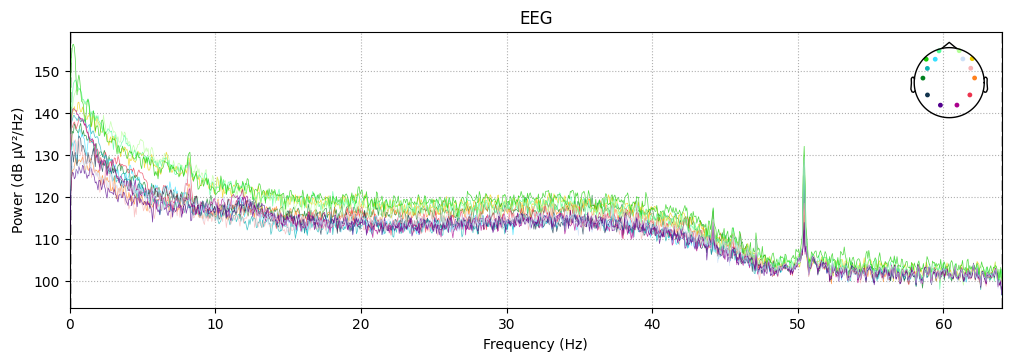

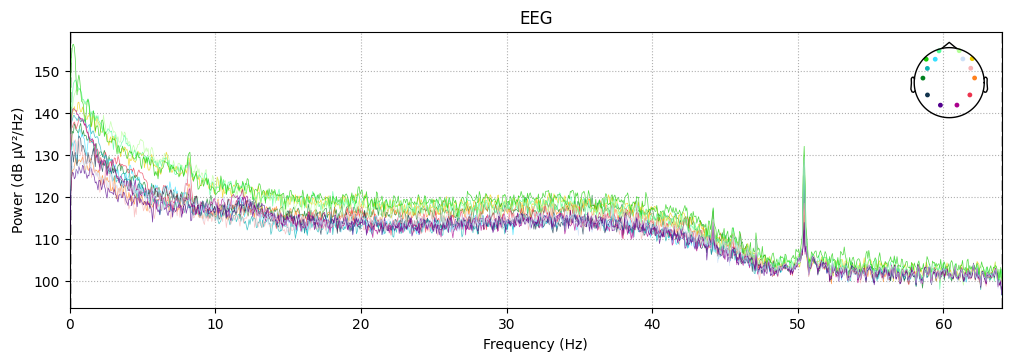

In [61]:
raw.compute_psd().plot()